# DSE 315/615 - Analysis and Prediction Of Electric Vehicle Prices As A Function Of The Model's Feature Parameters

### Name: S John Sharon Sandeep

### Roll No: 20234

### Department: Physics

### Course: Data Science in Practice, August - December 2022

# Overview

The goal of our project was to determine if the prices of electric vehicles could be modelled with respect to features of the model, with a reasonable correlation.<br> After performing an EDA, we were able to notice a correlation in the datapoints that were plotted on graphs, suggesting a dependency of prices on the said quantities. However, it is important to note that we had to drop two of the few columns that we had due to lack of data points, and had to work with a small data set. If we had a bigger dataset, we could possibly model a more accurate system, and possibly get new/different results. 

# Research Question

How does the price of a particular model of electric-vehicle depend on various features of that model?

# Background and Prior Work

One of the main threats to ecological safety is the increased emissions of greenhouse gases.
Promoting the purchase of electric vehicles and increasing their share among all cars in a given country can be considered as activities reducing the emissions of CO2 into the atmosphere. <br>
The aim of this project was to model the prices of electric vehicles as a part of promoting climate security.
For this project, an analysis of data from electric vehicle features and prices from a US based website was carried out. On this basis, how the features of the vehicles influenced the prices of the vehicles - was analyzed. For this purpose, regression models were built based on a decision tree algorithm, namely random forest and the method of Linear regression model was used. While a method of neural networks was used too, the results obtained from it was too erroneus possibly as a result of less number of datapoints. The developed models' predicted variables were compared with test variables and various metrics of evaluation were carried out.

References:
   -  https://mdpi-res.com/d_attachment/energies/energies-14-08534/article_deploy/energies-14-08534.pdf?version=1639751212
   -  https://www.diva-portal.org/smash/get/diva2:1664304/FULLTEXT01.pdf


# HYPOTHESIS

We hypothesize that prices of E-Vehicles (in general any set of vehicles of a particular classification) can be modelled as a function of various specifics of the automobile. In this case, we have modelled it with respect to Battery capacity, EPA (a quantified feature related to mileage), type of Drive and initial acceleration rate. We then expected a positive dependence on the first three factors, while expected that the price would negatively depend on initial-acceleration rate - (quantified by the time a vehicle of that model takes to accelerate from 0 to 60
kmph)

## SETUP

In [5]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


## Extracting The Dataset

The data was extracted from the website https://insideevs.com/reviews/344001/compare-evs/ titled: "Compare Electric Cars: EV Range, Specs, Pricing & More" by Mark Kane, last updated on 01-June, 2022. Here, the author had made a list of electric-vehicles that were in the U.S. market, comparing their prices and specs.

In [6]:
URL = 'https://insideevs.com/reviews/344001/compare-evs/'
r = requests.get(URL)
soup = BeautifulSoup(r.text, 'html.parser')

On inspecting the website, it was found that all the required data 'texts' were organized under a 'tr' label with children 'td'. Using this, a programme was figured out to scrape them effectively in a list.

In [7]:
data=[]
data_iterator1 = iter(soup.find_all('tr'))
while True:
    try:
        f = next(data_iterator1)
        iterator = iter(f.find_all('td'))
        if ((f.strong != None)):
            if ('2022' in f.strong.text):
                a=[]
                while True:
                    try:
                       f1=next(iterator)
                       if f1!= None:
                         a.append(f1.text)
                    except StopIteration:
                        break
                data.append(a)
                
    except StopIteration:
        break

In [8]:
data[0:4]

[['2022 Audi e-tron GT quattro 20"',
  '$102,400',
  '+$1,045',
  '$7,500',
  '$95,945'],
 ['2022 Audi RS e-tron GT quattro 20"',
  '$142,400',
  '+$1,045',
  '$7,500',
  '$135,945'],
 ['2022 Audi e-tron quattro 20"', '$65,900', '+$1,095', '$7,500', '$59,495'],
 ['2022 Audi e-tron Sportback quattro 20"',
  '$69,100',
  '+$1,095',
  '$7,500',
  '$62,695']]

In [90]:
len(data)

276

This however is two sets of alternating price datasets and features datasets.

Following is a programme to find the possible indices were a transition takes place from 'price' array to 'specs' array by checking the prescence or abscence of '$' in the strings.

In [9]:
p=[]
for i in range(0,len(data)-1):
    if (('$' in data[i][4]) & ('$' not in data[i+1][4])) | (('$' not in data[i][4]) & ('$' in data[i+1][4])):
        p.append(i)        

In [10]:
p

[100, 201, 210, 211, 215, 216, 221, 222, 238]

It was guessed from above that, the required indices are 100, 201 and 238 (length of data is 276) which was right.<br>(The other indices being transition from a data point with '$' to a null valued data point.)

In [12]:
data11=data[0:p[0]+1]

In [13]:
data12=data[p[0]+1:p[1]+1]

In [15]:
len(data11)-len(data12)

0

In [16]:
data21=data[p[1]+1:p[-1]+1]
data22=data[p[-1]+1:]

In [17]:
len(data21)-len(data22)

0

In [18]:
print(data11[0] ,'\n' ,data11[-1],'\n',data12[0],'\n',data12[-1],'\n',data21[0],'\n',data21[-1],'\n',data22[0],'\n',data22[-1])

['2022 Audi e-tron GT quattro 20"', '$102,400', '+$1,045', '$7,500', '$95,945'] 
 ['2022 Volkswagen ID.4 AWD Pro S 19"', '$48,940', '+$1,195', '$7,500', '$42,635'] 
 ['2022 Audi e-tron GT quattro 20"', 'AWD', '93.4', '238 mi(383 km)', '3.9', '152 mph(245 km/h)'] 
 ['2022 Volkswagen ID.4 AWD Pro S 19"', 'AWD', '82', '240 mi*(386 km)', '5.8', '111 mph(179 km/h)'] 
 ['2022 Audi A7 55 TFSI e quattro', '$75,900', '+$1,045', '$7,500', '$69,445'] 
 ['2022 Volvo XC90 T8 Twin Engine', '$63,450', '+$1,095', '$5,419', '$59,126'] 
 ['2022 Audi A7 55 TFSI e quattro', 'AWD', '17.9', '26 mi(42 km)', '410 mi(660 km)', '5.7'] 
 ['2022 Volvo XC90 T8 Twin Engine', 'AWD', '11.6', '18 mi(29 km)', '520 mi(837 km)', '\xa0']


As can be seen in last 4 cell outputs, no disparities can be found.

In [19]:
pricedf1=pd.DataFrame(data=data11,columns=['Model','Base_Price','Dest_Charge',	'Tax_Credit','Effective_Price'])
pricedf2=pd.DataFrame(data=data21,columns=['Model','Base_Price','Dest_Charge',	'Tax_Credit','Effective_Price'])
featuredf1=pd.DataFrame(data=data12,columns=['Model','Drive','Battery_(kWh)','EPA_(Total_Range)', '0-60_mph_(sec)','Top_Speed'])
featuredf2=pd.DataFrame(data=data22,columns=['Model','Drive','Battery_(kWh)','EPA_(EV_Range)','EPA_(Total_Range)', '0-60_mph_(sec)'])

In [20]:
featuredf1.head()

,Model,Drive,Battery_(kWh),EPA_(Total_Range),0-60_mph_(sec),Top_Speed
0,"2022 Audi e-tron GT quattro 20""",AWD,93.4,238 mi(383 km),3.9,152 mph(245 km/h)
1,"2022 Audi RS e-tron GT quattro 20""",AWD,93.4,232 mi(373 km),3.1,155 mph(249 km/h)
2,"2022 Audi e-tron quattro 20""",AWD,95,222 mi(357 km),5.5,124 mph(200 km/h)
3,"2022 Audi e-tron Sportback quattro 20""",AWD,95,218 mi(351 km),5.5,124 mph(200 km/h)
4,"2022 Audi e-tron S 20""",AWD,95,208 mi(335 km),4.3,130 mph(209 km/h)


In [21]:
featuredf2.head()

,Model,Drive,Battery_(kWh),EPA_(EV_Range),EPA_(Total_Range),0-60_mph_(sec)
0,2022 Audi A7 55 TFSI e quattro,AWD,17.9,26 mi(42 km),410 mi(660 km),5.7
1,2022 Audi Q5 55 TFSI e quattro,AWD,17.9,23 mi(37 km),390 mi(628 km),5.0
2,2022 BMW 330e,RWD,12,22 mi(35 km),320 mi(515 km),5.6
3,2022 BMW 330e xDrive,AWD,12,20 mi(32 km),290 mi(467 km),5.7
4,2022 BMW 530e,RWD,12,21 mi(34 km),340 mi(547 km),5.7


In [22]:
pricedf1.head()

,Model,Base_Price,Dest_Charge,Tax_Credit,Effective_Price
0,"2022 Audi e-tron GT quattro 20""","$102,400","+$1,045","$7,500","$95,945"
1,"2022 Audi RS e-tron GT quattro 20""","$142,400","+$1,045","$7,500","$135,945"
2,"2022 Audi e-tron quattro 20""","$65,900","+$1,095","$7,500","$59,495"
3,"2022 Audi e-tron Sportback quattro 20""","$69,100","+$1,095","$7,500","$62,695"
4,"2022 Audi e-tron S 20""","$84,800","+$1,095","$7,500","$78,395"


In [23]:
pricedf2.head()


,Model,Base_Price,Dest_Charge,Tax_Credit,Effective_Price
0,2022 Audi A7 55 TFSI e quattro,"$75,900","+$1,045","$7,500","$69,445"
1,2022 Audi Q5 55 TFSI e quattro,"$54,600","+$1,095","$7,500","$48,195"
2,2022 BMW 330e,"$42,950",+$995,"$5,836","$38,109"
3,2022 BMW 330e xDrive,"$44,950",+$995,"$5,836","$40,109"
4,2022 BMW 530e,"$55,550",+$995,"$5,836","$50,709"


#### Concatenating the dataframes and merging them

In [24]:
featdf=pd.concat([featuredf1,featuredf2])
pricedf=pd.concat([pricedf1,pricedf2])

In [25]:
df=pd.merge(featdf,pricedf)

# Data Cleaning

### Here is the raw data that was organized in a dataframe

In [26]:
df.head()

,Model,Drive,Battery_(kWh),EPA_(Total_Range),0-60_mph_(sec),Top_Speed,EPA_(EV_Range),Base_Price,Dest_Charge,Tax_Credit,Effective_Price
0,"2022 Audi e-tron GT quattro 20""",AWD,93.4,238 mi(383 km),3.9,152 mph(245 km/h),NaN,"$102,400","+$1,045","$7,500","$95,945"
1,"2022 Audi RS e-tron GT quattro 20""",AWD,93.4,232 mi(373 km),3.1,155 mph(249 km/h),NaN,"$142,400","+$1,045","$7,500","$135,945"
2,"2022 Audi e-tron quattro 20""",AWD,95,222 mi(357 km),5.5,124 mph(200 km/h),NaN,"$65,900","+$1,095","$7,500","$59,495"
3,"2022 Audi e-tron Sportback quattro 20""",AWD,95,218 mi(351 km),5.5,124 mph(200 km/h),NaN,"$69,100","+$1,095","$7,500","$62,695"
4,"2022 Audi e-tron S 20""",AWD,95,208 mi(335 km),4.3,130 mph(209 km/h),NaN,"$84,800","+$1,095","$7,500","$78,395"


In [27]:
df.tail()

,Model,Drive,Battery_(kWh),EPA_(Total_Range),0-60_mph_(sec),Top_Speed,EPA_(EV_Range),Base_Price,Dest_Charge,Tax_Credit,Effective_Price
133,2022 Volvo S60 T8 Twin Engine,AWD,11.6,510 mi(821 km),4.3,NaN,22 mi(35 km),"$47,650","+$1,045","$5,419","$43,276"
134,2022 Volvo S90 T8 Twin Engine,AWD,11.6,490 mi(788 km),4.8,NaN,21 mi(34 km),"$60,050","+$1,045","$5,419","$55,676"
135,2022 Volvo V60 T8 Twin Engine Polestar,AWD,11.6,510 mi(821 km),4.3,NaN,22 mi(35 km),"$67,550","+$1,095","$5,419","$63,226"
136,2022 Volvo XC60 T8 Twin Engine,AWD,11.6,500 mi(805 km),,NaN,18 mi(29 km),"$53,500","+$1,095","$5,419","$49,176"
137,2022 Volvo XC90 T8 Twin Engine,AWD,11.6,520 mi(837 km),,NaN,18 mi(29 km),"$63,450","+$1,095","$5,419","$59,126"


#### Initially, it's a practice to fill the missing data with zero

In [28]:
df1=df
df1=df1.fillna(0)

#### Getting the name of the manufacturer from the car name might be useful

In [29]:
df1['Manufacturer']=df1.Model.str.split(' ',1,expand=True)[1].str.split(' ',1,expand=True)[0]

#### Removing all metric units while leaving values in kilometers and dollars

For EPA(Total Range)

In [30]:
df1.iloc[:,3]=df1.iloc[:,3].str.split('(',1,expand=True)[1].str.split(' ',1,expand=True)[0]

For Top Speed

In [31]:
df1.iloc[:,5]=df1.iloc[:,5].str.split('(',1,expand=True)[1].str.split(' ',1,expand=True)[0]

For EPA(EV Range)

In [32]:
df1.iloc[:,6]=df1.iloc[:,6].str.split('(',1,expand=True)[1].str.split(' ',1,expand=True)[0]

For all the 'prices'

In [33]:
for i in range(7,11):
   df1.iloc[:,i]=df1.iloc[:,i].str.split('$',1,expand=True)[1].str.replace(',','')

Filling NaN with 0

In [34]:
df1=df1.fillna(0)

In [35]:
df1

,Model,Drive,Battery_(kWh),EPA_(Total_Range),0-60_mph_(sec),Top_Speed,EPA_(EV_Range),Base_Price,Dest_Charge,Tax_Credit,Effective_Price,Manufacturer
0,"2022 Audi e-tron GT quattro 20""",AWD,93.4,383,3.9,245,0,102400,1045,7500,95945,Audi
1,"2022 Audi RS e-tron GT quattro 20""",AWD,93.4,373,3.1,249,0,142400,1045,7500,135945,Audi
2,"2022 Audi e-tron quattro 20""",AWD,95,357,5.5,200,0,65900,1095,7500,59495,Audi
3,"2022 Audi e-tron Sportback quattro 20""",AWD,95,351,5.5,200,0,69100,1095,7500,62695,Audi
4,"2022 Audi e-tron S 20""",AWD,95,335,4.3,209,0,84800,1095,7500,78395,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
133,2022 Volvo S60 T8 Twin Engine,AWD,11.6,821,4.3,0,35,47650,1045,5419,43276,Volvo
134,2022 Volvo S90 T8 Twin Engine,AWD,11.6,788,4.8,0,34,60050,1045,5419,55676,Volvo
135,2022 Volvo V60 T8 Twin Engine Polestar,AWD,11.6,821,4.3,0,35,67550,1095,5419,63226,Volvo
136,2022 Volvo XC60 T8 Twin Engine,AWD,11.6,805,,0,29,53500,1095,5419,49176,Volvo


There are still missing values at (136,5) as can seen, checking what this is:

In [36]:
df1.iloc[136,4]

'\xa0'

In [37]:
df1.replace('\xa0',0,inplace=True)

### Hence our cleaning is complete

# Data Analysis & Results 

## Descriptive Analysis

In [38]:
df1.head()

,Model,Drive,Battery_(kWh),EPA_(Total_Range),0-60_mph_(sec),Top_Speed,EPA_(EV_Range),Base_Price,Dest_Charge,Tax_Credit,Effective_Price,Manufacturer
0,"2022 Audi e-tron GT quattro 20""",AWD,93.4,383,3.9,245,0,102400,1045,7500,95945,Audi
1,"2022 Audi RS e-tron GT quattro 20""",AWD,93.4,373,3.1,249,0,142400,1045,7500,135945,Audi
2,"2022 Audi e-tron quattro 20""",AWD,95,357,5.5,200,0,65900,1095,7500,59495,Audi
3,"2022 Audi e-tron Sportback quattro 20""",AWD,95,351,5.5,200,0,69100,1095,7500,62695,Audi
4,"2022 Audi e-tron S 20""",AWD,95,335,4.3,209,0,84800,1095,7500,78395,Audi


In [39]:
df1.tail()

,Model,Drive,Battery_(kWh),EPA_(Total_Range),0-60_mph_(sec),Top_Speed,EPA_(EV_Range),Base_Price,Dest_Charge,Tax_Credit,Effective_Price,Manufacturer
133,2022 Volvo S60 T8 Twin Engine,AWD,11.6,821,4.3,0,35,47650,1045,5419,43276,Volvo
134,2022 Volvo S90 T8 Twin Engine,AWD,11.6,788,4.8,0,34,60050,1045,5419,55676,Volvo
135,2022 Volvo V60 T8 Twin Engine Polestar,AWD,11.6,821,4.3,0,35,67550,1095,5419,63226,Volvo
136,2022 Volvo XC60 T8 Twin Engine,AWD,11.6,805,0,0,29,53500,1095,5419,49176,Volvo
137,2022 Volvo XC90 T8 Twin Engine,AWD,11.6,837,0,0,29,63450,1095,5419,59126,Volvo


### 1) Checking the nature of the data and the data types:

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Model              138 non-null    object
 1   Drive              138 non-null    object
 2   Battery_(kWh)      138 non-null    object
 3   EPA_(Total_Range)  138 non-null    object
 4   0-60_mph_(sec)     138 non-null    object
 5   Top_Speed          138 non-null    object
 6   EPA_(EV_Range)     138 non-null    object
 7   Base_Price         138 non-null    object
 8   Dest_Charge        138 non-null    object
 9   Tax_Credit         138 non-null    object
 10  Effective_Price    138 non-null    object
 11  Manufacturer       138 non-null    object
dtypes: object(12)
memory usage: 14.0+ KB


In [41]:
df1.corr()

""


#### df1.corr is not working as all the values are of type 'object' and not 'float' or 'int'. Hence converting them to float:

It was found that the second box of code from here gave an error message that one of the data-point had a '*' character, hence on removing any such occurence by the following code, the rest of the programme runs smoothly.

In [42]:
for i in range(0,138):
    for j in range(2,len(df1.columns)-1):
        if type(df1.iloc[i,j])==str:
           df1.iloc[i,j]=df1.iloc[i,j].replace('*','')

code to convert all datapoints to float

In [43]:
for i in range(2,11):
    s=df1.iloc[:,i].astype("float")
    df1.iloc[:,i]=s

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              138 non-null    object 
 1   Drive              138 non-null    object 
 2   Battery_(kWh)      138 non-null    float64
 3   EPA_(Total_Range)  138 non-null    float64
 4   0-60_mph_(sec)     138 non-null    float64
 5   Top_Speed          138 non-null    float64
 6   EPA_(EV_Range)     138 non-null    float64
 7   Base_Price         138 non-null    float64
 8   Dest_Charge        138 non-null    float64
 9   Tax_Credit         138 non-null    float64
 10  Effective_Price    138 non-null    float64
 11  Manufacturer       138 non-null    object 
dtypes: float64(9), object(3)
memory usage: 14.0+ KB


In [45]:
df1.corr()

,Battery_(kWh),EPA_(Total_Range),0-60_mph_(sec),Top_Speed,EPA_(EV_Range),Base_Price,Dest_Charge,Tax_Credit,Effective_Price
Battery_(kWh),1.000000,-0.416932,0.021037,0.541381,-0.806324,0.369016,0.271823,-0.029637,0.368822
EPA_(Total_Range),-0.416932,1.000000,-0.374290,-0.337081,0.671967,0.015126,-0.047385,-0.177462,0.028765
0-60_mph_(sec),0.021037,-0.374290,1.000000,0.170506,-0.297748,-0.107258,-0.146404,0.049005,-0.116028
Top_Speed,0.541381,-0.337081,0.170506,1.000000,-0.628927,0.449862,0.201852,-0.190637,0.460433
EPA_(EV_Range),-0.806324,0.671967,-0.297748,-0.628927,1.000000,-0.231807,-0.212105,0.057094,-0.232167
Base_Price,0.369016,0.015126,-0.107258,0.449862,-0.231807,1.000000,0.391097,0.010203,0.997955
Dest_Charge,0.271823,-0.047385,-0.146404,0.201852,-0.212105,0.391097,1.000000,0.185544,0.372936
Tax_Credit,-0.029637,-0.177462,0.049005,-0.190637,0.057094,0.010203,0.185544,1.000000,-0.051030
Effective_Price,0.368822,0.028765,-0.116028,0.460433,-0.232167,0.997955,0.372936,-0.051030,1.000000


#### It can be seen that many variables have appreciable correlation. This is better spotted/visualized using a heat map:

<AxesSubplot:>

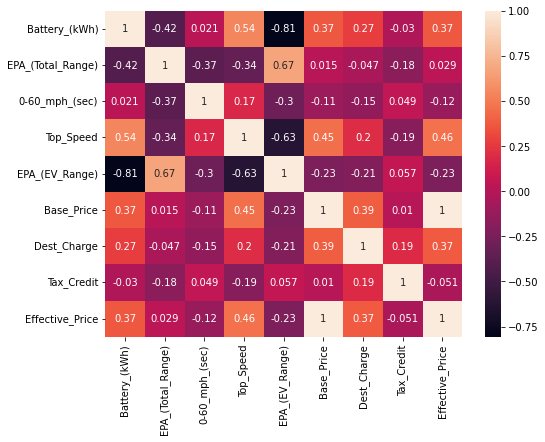

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True)

##### It can be seen that there is high correlation between 'Base Price' and 'Effective Price' which is expected. <br> Other than that, there is considerable correlation between 'Top Speed' and 'Prices', and unusually, there is a good **correlation between 'Top Speed' and 'Battery'**

### 2) We can check the distribution of cars among different drive types

<AxesSubplot:xlabel='Drive', ylabel='count'>

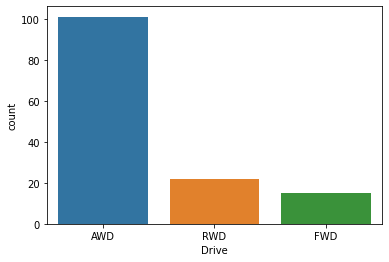

In [47]:
sns.countplot(x='Drive',data=df1)

In [48]:
Manufacturers=np.array(df1.Manufacturer.value_counts().index)

[Text(0, 0, 'Porsche'),
 Text(1, 0, 'Ford'),
 Text(2, 0, 'Tesla'),
 Text(3, 0, 'Audi'),
 Text(4, 0, 'Hyundai'),
 Text(5, 0, 'Kia'),
 Text(6, 0, 'BMW'),
 Text(7, 0, 'Volvo'),
 Text(8, 0, 'Lucid'),
 Text(9, 0, 'Volkswagen'),
 Text(10, 0, 'Nissan'),
 Text(11, 0, 'Lincoln'),
 Text(12, 0, 'Jeep'),
 Text(13, 0, 'Rivian'),
 Text(14, 0, 'Polestar'),
 Text(15, 0, 'MINI'),
 Text(16, 0, 'Mercedes'),
 Text(17, 0, 'Chevrolet'),
 Text(18, 0, 'Mazda'),
 Text(19, 0, 'Jaguar'),
 Text(20, 0, 'Chrysler'),
 Text(21, 0, 'Ferrari'),
 Text(22, 0, 'GMC'),
 Text(23, 0, 'Lexus'),
 Text(24, 0, 'Mitsubishi'),
 Text(25, 0, 'Subaru'),
 Text(26, 0, 'Toyota')]

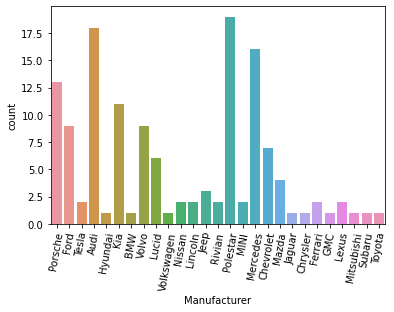

In [49]:
g=sns.countplot(x='Manufacturer',data=df1)
g.set_xticklabels(labels=Manufacturers,rotation=80)

The Manufacturer types that have more number of models in this list might be a reflection of: <br>1) The actual distribution of popular models in the market <br>2) The Bias or Negligence to other models by the website content creators.

In [50]:
df1.describe()

,Battery_(kWh),EPA_(Total_Range),0-60_mph_(sec),Top_Speed,EPA_(EV_Range),Base_Price,Dest_Charge,Tax_Credit,Effective_Price
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,70.170290,508.188406,3.808261,122.050725,9.710145,72926.398551,1172.101449,6155.333333,68072.471014
std,39.864523,181.300313,2.303965,111.433023,17.033759,41246.523462,270.531925,2587.945104,41179.834513
min,7.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.950000,383.500000,2.625000,0.000000,0.000000,45900.000000,1095.000000,6010.500000,40130.500000
50%,78.600000,483.500000,4.250000,173.000000,0.000000,57825.000000,1195.000000,7500.000000,52280.000000
75%,95.000000,601.000000,5.500000,217.000000,23.000000,92993.500000,1300.000000,7500.000000,86929.750000
max,200.000000,1030.000000,8.000000,322.000000,61.000000,189800.000000,1695.000000,7500.000000,183650.000000


#### 3) Now, different combinations of variables can be scatter plotted to understand data distribution

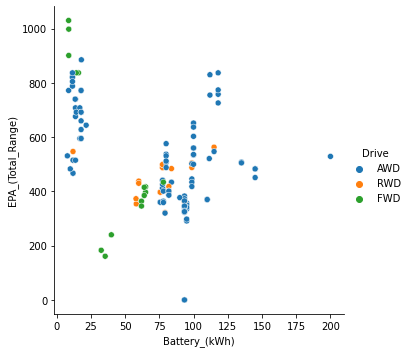

In [51]:
sns.relplot(x='Battery_(kWh)',y="EPA_(Total_Range)",hue='Drive',height=5,data=df1)

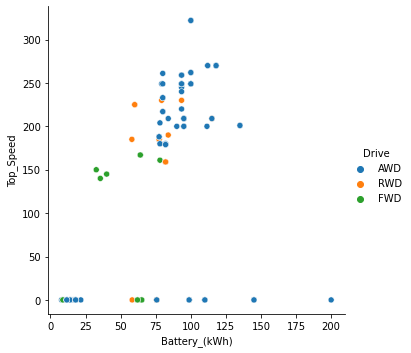

In [52]:
sns.relplot(x='Battery_(kWh)',y="Top_Speed",hue='Drive',height=5,data=df1)

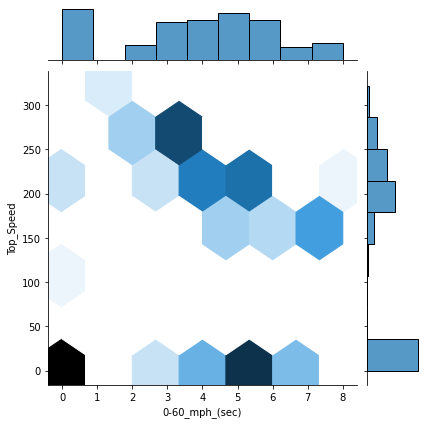

In [53]:
sns.jointplot(x=df1['0-60_mph_(sec)'],y=df1['Top_Speed'],kind='hex')

#### Analyzing the dependency of price (Considering Effective price here) on car's features

C:\Users\johns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='Effective_Price', ylabel='Density'>

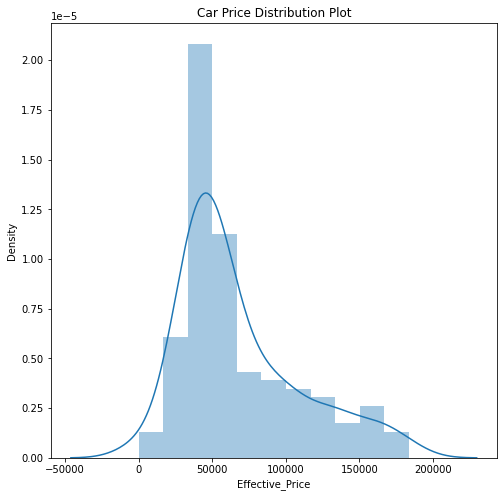

In [54]:
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(df1['Effective_Price'])

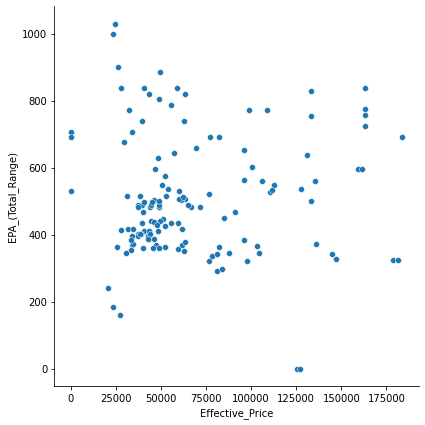

In [55]:
sns.relplot(x="Effective_Price", y="EPA_(Total_Range)", height=6,data=df1)

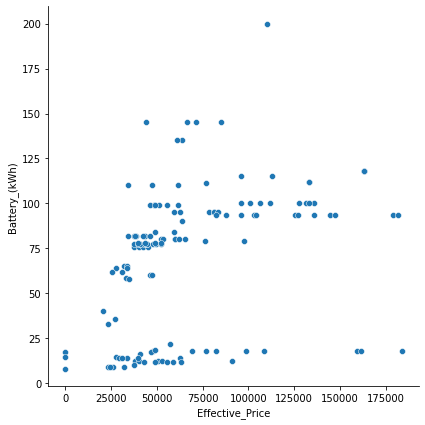

In [56]:
sns.relplot(x="Effective_Price", y="Battery_(kWh)", height=6,data=df1)

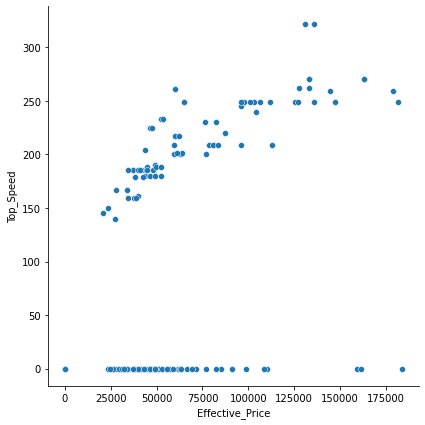

In [57]:
sns.relplot(x="Effective_Price", y="Top_Speed", height=6,data=df1)

#### While other plots looked more scattered, the relationship of price with battery and with Top Speed is seen more strongly in the last 2 graphs.

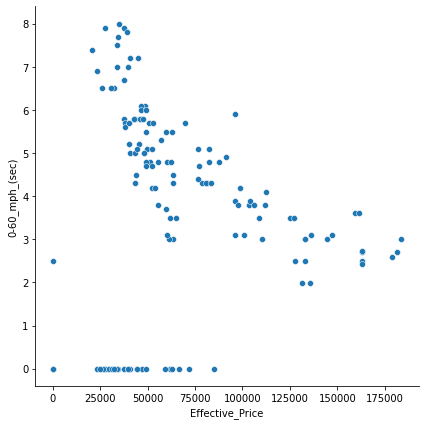

In [89]:
sns.relplot(x="Effective_Price", y="0-60_mph_(sec)", height=6,data=df1)

#### This plot is more intriguing. It shows that, with decreased time required for acceleration (which is a favourable quality in a vehicle), the cost of the vehicle reduces too... which is counterintuitive. <br><br>
#### This might be explained in the following sense:<br> As the price of the vehicle increases, the vehicle's engineering is expected to be such that it's wearing quality is minimized. This is reflected in it's acceleration quality, where it's taken care that it doesn't reach arbitrary speeds spontaneously leading to faster wear and tear.<br>

<br>

# Price Prediction using Machine Learning

### Since our original dataset df had 5 of it's columns namely Drive, Battery_(kWh), EPA_(Total_Range), 0-60_mph_(sec) and Effective_Price (ignoring other 'price' columns as they are all corellated) with all 138 rows as "non-null", it would be safe to work with these 5 columns alone.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Model              138 non-null    object
 1   Drive              138 non-null    object
 2   Battery_(kWh)      138 non-null    object
 3   EPA_(Total_Range)  138 non-null    object
 4   0-60_mph_(sec)     138 non-null    object
 5   Top_Speed          101 non-null    object
 6   EPA_(EV_Range)     37 non-null     object
 7   Base_Price         138 non-null    object
 8   Dest_Charge        138 non-null    object
 9   Tax_Credit         138 non-null    object
 10  Effective_Price    138 non-null    object
dtypes: object(11)
memory usage: 17.0+ KB


### Since our machine learning model takes only number inputs, we have to convert 'Drive' from string to a number representation:

In [59]:
import category_encoders as ce
train_df=df1
encoder= ce.OrdinalEncoder(cols=['Drive'],return_df=True, mapping=[{'col':'Drive','mapping':{'FWD':1,'RWD':2,'AWD':3}}])
 
df_train = encoder.fit_transform(train_df)

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              138 non-null    object 
 1   Drive              138 non-null    int32  
 2   Battery_(kWh)      138 non-null    float64
 3   EPA_(Total_Range)  138 non-null    float64
 4   0-60_mph_(sec)     138 non-null    float64
 5   Top_Speed          138 non-null    float64
 6   EPA_(EV_Range)     138 non-null    float64
 7   Base_Price         138 non-null    float64
 8   Dest_Charge        138 non-null    float64
 9   Tax_Credit         138 non-null    float64
 10  Effective_Price    138 non-null    float64
 11  Manufacturer       138 non-null    object 
dtypes: float64(9), int32(1), object(2)
memory usage: 17.5+ KB


### Dropping all the string columns, leaving only columns with float/integer points, so that it can be modelled using machine learning (in this case, Random Forest Regression will be used)

In [61]:
X= df_train.drop(['Model', 'Top_Speed','EPA_(EV_Range)','Base_Price','Dest_Charge','Tax_Credit','Effective_Price' ,'Manufacturer'], axis=1)
X=X.values

In [62]:
X

array([[3.000e+00, 9.340e+01, 3.830e+02, 3.900e+00],
       [3.000e+00, 9.340e+01, 3.730e+02, 3.100e+00],
       [3.000e+00, 9.500e+01, 3.570e+02, 5.500e+00],
       [3.000e+00, 9.500e+01, 3.510e+02, 5.500e+00],
       [3.000e+00, 9.500e+01, 3.350e+02, 4.300e+00],
       [3.000e+00, 9.500e+01, 2.910e+02, 4.300e+00],
       [3.000e+00, 9.500e+01, 3.410e+02, 4.300e+00],
       [3.000e+00, 9.500e+01, 2.980e+02, 4.300e+00],
       [2.000e+00, 8.200e+01, 4.020e+02, 7.900e+00],
       [3.000e+00, 8.200e+01, 3.880e+02, 5.800e+00],
       [3.000e+00, 8.200e+01, 3.880e+02, 5.800e+00],
       [2.000e+00, 8.390e+01, 4.840e+02, 5.500e+00],
       [3.000e+00, 8.390e+01, 4.340e+02, 3.700e+00],
       [3.000e+00, 1.115e+02, 5.210e+02, 4.400e+00],
       [1.000e+00, 6.500e+01, 4.170e+02, 6.500e+00],
       [1.000e+00, 6.500e+01, 3.970e+02, 7.000e+00],
       [3.000e+00, 1.100e+02, 3.700e+02, 0.000e+00],
       [3.000e+00, 1.450e+02, 4.830e+02, 0.000e+00],
       [3.000e+00, 1.100e+02, 3.700e+02, 0.000

### Target data:

In [63]:
Y=df_train['Effective_Price'].values

### Splitting the data into a 4/5,1/5 ratio training data and test data sets

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [65]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [66]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [67]:
y_pred= regressor.predict(X_test)

### Checking if this y fits the test_y approximately (by finding the difference and dividing by mean of test set, we get a reasonable estimate of this):

In [68]:
(y_pred-y_test)/y_test.mean()

array([ 0.29665916,  0.18120262, -0.04261745,  0.07558398, -0.38929875,
        0.27149254,  0.06958808, -0.19389189, -0.09551556,  0.26826702,
        0.08391868,  0.6112462 ,  0.19357806,  0.08527492,  0.28413247,
       -0.17723788,  0.10303638, -0.22461319, -0.19637011, -0.15757054,
       -0.11002937, -0.64361689,  0.13469285, -0.09251108,  0.08824931,
        0.10626801, -0.06737496,  0.06740156])

### It indeed does fit the test_model satisfactorily!

## Standard Accuracy metrics for Predicted Prices of Electric Vehicle:

### Finding mean absolute error:

In [69]:
mean_absolute_error(y_test,y_pred)

12480.457653061225

### Mean squared error:

In [70]:
mean_squared_error(y_test,y_pred)

250521332.35826877

### Finding R Squared:

In [71]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.836487461691021


### This model has a good R score, hence it fits the test values well.

<br>

## We can try to solve the same using Neural Network

In [72]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(4,)))
model.add(Dense(units=1, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=10, epochs=9, verbose=True, validation_split=.1)

Epoch 1/9
10/10 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/9
10/10 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/9
10/10 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/9
10/10 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/9
10/10 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/9
10/10 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/9
10/10 [==============================] - 0s 4ms/step - loss

1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


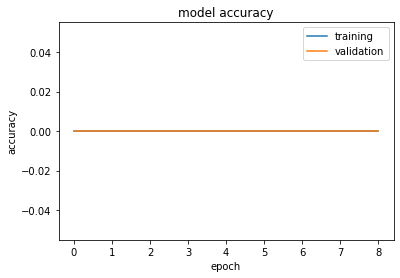

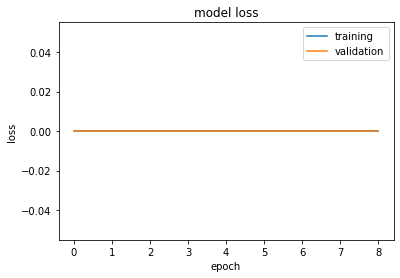

Test loss: 0.0
Test accuracy: 0.0


In [74]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [76]:
r2 = r2_score(y_test,model.predict(X_test))
print(r2)

1/1 [==============================] - 0s 22ms/step
-2.8253903475948183


### As indicated by the graphs, and the negative R square, neural networks doesn't model this system very well. This must be due to the limited amount of data (only 138 entries) available for training.

<br>

## We could also try modelling this problem using **Linear Regression**

<br>

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model=LinearRegression()
model=model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [81]:
((y_pred-y_test)/y_test.mean())

array([ 0.40515744,  0.21344523,  0.41188965, -0.03307684,  0.19616429,
        0.2740244 ,  0.50748354,  0.16185973,  0.13962056,  0.32923816,
        0.50539682,  0.26770689,  0.52363842,  0.39426659,  0.15972128,
        0.48169983,  0.54514579, -1.57618582, -0.94916531, -0.255725  ,
       -0.20050859, -0.71198163, -0.13758461,  0.53276591, -0.2428127 ,
       -0.45982436, -0.12990631, -0.05273099])

Values lie close to 0 for the above expression..

In [82]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.31303197335024213


### This model has a satisfactory R score. While its performance is comparatively less than that of Random forest regression, this method has an advantage as it provides 'Coefficients of slope' with respect to each variable, as are given by the following lines of code:

In [84]:
model.intercept_

-36206.17461147177

In [87]:
model.coef_

array([23626.79450254,   319.9129297 ,    37.50341245,   371.19439936])

### This tells that it varies with unit change of: <br>1) Drive Variable: price increases by 23626.79 units($) <br>2)Battery capacity: price increases by 319 units <br>3)EPA: price increases by 37 units <br>4)time of acceleration from 0-60 kmph: price increases by by 371 units <br>
### The last result that the price increases with time of acceleration is a result that we have already seen from the plots in the previous section of Descriptive analysis.

# Ethics and Privacy

   - Data Permission   
     
   The dataset used were web scraped off of the mentioned website. The site does not explicitly state anywhere that the content could be copied, modified, and redistributed. However, the site must be acknowledged as we linked all of the charts and data we scraped from the website.
       
       
   - Data Discrepancy and biases  
     
   Since no other data source could be found containing information about the latest E-Vehicle on the market, the mentioned website had to relied on. As this page is more of a blog than an official website, it's data might be biased based on the author's perception and likings (such as it might have more models of his/her favourite manufacturer). Also the values of data in the website is prone to error, either by delliberate or careless means.<br><br>
   Also, the number of models available were low, hence this model may not represent the general dependence of price on various factors. Moreover, the number of factors studied were less, while prices should depend on so many other factors such as seating capacity, build, charging time .etc.

    
         
   - Missing data  
        
   While there were missing data for 'Top-speed' , this doesn't affect the rest of our analysis, as this column was completely skipped. But we could have done better by taking into account this variable too. 
          
       
   
   - Implications:
   
   Since the results of our analysis demonstrated that as acceleration time increases, so does the price of the vehicle, this does not mean that we are implying that in order to reduce the vehicle's price, the initial acceleration of the vehicle should be more.  

# Conclusion and Discussion


The Question of our research is to explore the correlation between electric-vehicle prices and the various features of the automobile. From the dataset at hand, we tried to show that, how prices depend on the four factors : Battery capacity, EPA, initial acceleration rate and type of Drive.<br>
  
We saw that, using the random forest machine learning algorithm we could, model a relationship between price and the said set of variables with an R score of 0.836.<br>

We also showed that, if this system was linearly modelled, the dependence of price on all the said four factors were positive, which while is expected for the variables Battery capacity and EPA, it was counterintuitive that it positively depended on initial acceleration rate (that is the higher the price, the slower is the vehicle to pick up a speed of 60 kmph from 0). <br>


However, we need to check if these results would agree on a larger dataset, which however was difficult to obtain from the internet, (while only old or artificial datasets were available on Kaggle).
Also this data analysis must be repeated on a dataset with more variables that the E-vehicle prices could depend on.
  
